In [1]:
import os

import numpy as np
import scipy.integrate as integrate
import scipy.interpolate as interp
import scipy.ndimage as ndi

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.rcParams['text.usetex'] = True

from migdalcalc import migdalcalc as mc
from migdalcalc.migdal import kinematics as kin

In [4]:
def read_shell_ibe(ibe_datafile, n_shell, E_nl):
    n_pts_shell = 254
    
    dE_arr = []
    pe_arr = []
    
    with open(ibe_datafile, "r") as df:
        data = df.readlines()
        
        n_lines = len(data)
        shells = []
        

        shell_slice = slice(n_pts_shell*(n_shell-1), n_pts_shell*(n_shell))
        n_prin, ell = np.genfromtxt((data[shell_slice])[slice(1,2)])
            
        shell_data = np.genfromtxt(data[shell_slice], skip_header=3)
            
        dE_arr = []
        pe_arr = []
        #Add a zero point, since ibe only goes down to 1 eV
        dE_arr.append(E_nl)
        pe_arr.append((1/(2*np.pi))*shell_data[0][1])
        
        for data_point in shell_data:
            deltaE = data_point[0] + E_nl
            diff_P = (1/(2*np.pi))*data_point[1]
                
            dE_arr.append(deltaE)
            pe_arr.append(diff_P)
                
    return interp.interp1d(dE_arr, pe_arr, bounds_error=False, fill_value = 0, kind='linear')


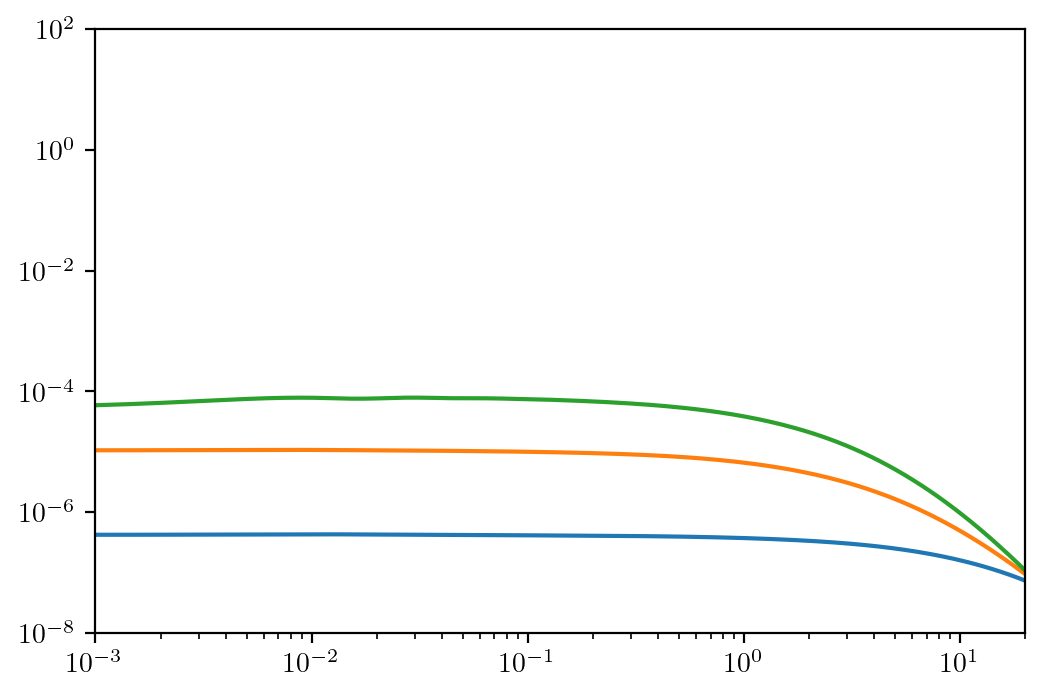

In [41]:
ibe_1s = read_shell_ibe("./input/ibe/Xe.dat", 1, 0)
ibe_2s = read_shell_ibe("./input/ibe/Xe.dat", 2, 0)
ibe_2p = read_shell_ibe("./input/ibe/Xe.dat", 3, 0)

scale_factor = (511)**2

plt.plot(ibe_1s.x*1e-3, scale_factor*ibe_1s.y*1e3)
plt.plot(ibe_2s.x*1e-3, scale_factor*ibe_2s.y*1e3)
plt.plot(ibe_2p.x*1e-3, scale_factor*ibe_2p.y*1e3)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-8,1e2)
plt.xlim(1e-3, 20)

plt.show()

In [44]:
ibe_2s_int = integrate.quad(ibe_2s, 0, 70000, limit=200, epsrel=1e-5)
ibe_2p_int = integrate.quad(ibe_2s, 0, 70000, limit=200, epsrel=1e-5)

print(scale_factor*ibe_2s_int[0])
print(scale_factor*integrate.trapezoid(ibe_2p.y, ibe_2p.x))

2.9690567138856865e-05
0.00013312345445936914
